# PANKADAUM Generator 2000
Uma *tentativa* de criar um gerador de letras de música automático.


---


Universidade de Brasília

Prof.: Roberta Barbosa Oliveira

Alunos:

*   Matheus Stauffer (coloque sua matrícula aqui)
*   Pedro Torres (16/0141575).

Brasília, 7 de outubro de 2021.

Dataframe: https://www.kaggle.com/neisse/scrapped-lyrics-from-6-genres?select=lyrics-data.csv

## Setup

In [3]:
# Download dataframes from Github
!wget https://github.com/PeterTowers/pankadaum-generator/raw/main/dataframes/dataframes.zip

# Unzip dataframes
!unzip "/content/dataframes.zip" -d "."

--2021-10-06 22:28:02--  https://github.com/PeterTowers/pankadaum-generator/raw/main/dataframes/dataframes.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PeterTowers/pankadaum-generator/main/dataframes/dataframes.zip [following]
--2021-10-06 22:28:02--  https://raw.githubusercontent.com/PeterTowers/pankadaum-generator/main/dataframes/dataframes.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79488219 (76M) [application/zip]
Saving to: ‘dataframes.zip.1’

dataframes.zip.1    100%[===================>]  75.81M   160MB/s    in 0.5s    

2021-10-06 22:28:02 (160 MB/s) - ‘dataframes.zip.1’ s

## Análise do dataframe

In [4]:
import pandas as pd

artists_df = pd.read_csv(r"./artists-data.csv")

print(artists_df.info(), end="\n\n")
artists_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      3242 non-null   object 
 1   Songs       3242 non-null   int64  
 2   Popularity  3242 non-null   float64
 3   Link        3242 non-null   object 
 4   Genre       3242 non-null   object 
 5   Genres      3238 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 152.1+ KB
None



,Artist,Songs,Popularity,Link,Genre,Genres
0,10000 Maniacs,110,0.3,/10000-maniacs/,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
1,12 Stones,75,0.3,/12-stones/,Rock,Rock; Gospel/Religioso; Hard Rock; Grunge; Roc...
2,311,196,0.5,/311/,Rock,Rock; Surf Music; Reggae; Ska; Pop/Rock; Rock ...
3,4 Non Blondes,15,7.5,/4-non-blondes/,Rock,Rock; Pop/Rock; Rock Alternativo; Grunge; Blue...
4,A Cruz Está Vazia,13,0.0,/a-cruz-esta-vazia/,Rock,Rock


In [5]:
lyrics_df = pd.read_csv(r"./lyrics-data.csv")

print(lyrics_df.info(), end="\n\n")
lyrics_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209522 entries, 0 to 209521
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ALink   209522 non-null  object
 1   SName   209522 non-null  object
 2   SLink   209522 non-null  object
 3   Lyric   209484 non-null  object
 4   Idiom   206375 non-null  object
dtypes: object(5)
memory usage: 8.0+ MB
None



,ALink,SName,SLink,Lyric,Idiom
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH


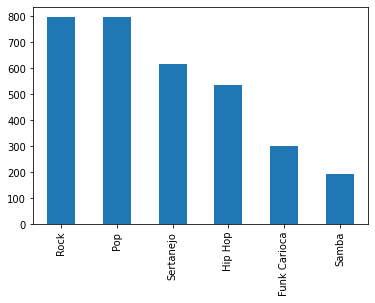

In [6]:
# Plot lesion count as histogram
artists_df['Genre'].value_counts().plot(kind='bar')

### Remocao de letras duplicatas

In [7]:
lyrics_df.loc[lyrics_df['SName'] == "Smells Like Teen Spirit"]

,ALink,SName,SLink,Lyric,Idiom
11365,/cassia-eller/,Smells Like Teen Spirit,/cassia-eller/smells-like-teen-spirit.html,"Load up on guns, bring your friends. it's fun ...",ENGLISH
41810,/nirvana/,Smells Like Teen Spirit,/nirvana/smells-like-teen-spirit.html,Load up your guns and bring your friends. It's...,ENGLISH
41933,/nirvana/,Smells Like Teen Spirit,/nirvana/smells-like-teen-spirit.html,Load up your guns and bring your friends. It's...,ENGLISH
44748,/patti-smith/,Smells Like Teen Spirit,/patti-smith/smells-like-teen-spirit.html,Load up on guns and bring your friends. It's f...,ENGLISH
44865,/patti-smith/,Smells Like Teen Spirit,/patti-smith/smells-like-teen-spirit.html,Load up on guns and bring your friends. It's f...,ENGLISH
68757,/tori-amos/,Smells Like Teen Spirit,/tori-amos/smells-like-teen-spirit.html,Load up on guns and bring your friends. it's f...,ENGLISH
68992,/tori-amos/,Smells Like Teen Spirit,/tori-amos/smells-like-teen-spirit.html,Load up on guns and bring your friends. it's f...,ENGLISH
107778,/cassia-eller/,Smells Like Teen Spirit,/cassia-eller/smells-like-teen-spirit.html,"Load up on guns, bring your friends. it's fun ...",ENGLISH
134581,/michael-buble/,Smells Like Teen Spirit,/michael-buble/smells-like-teen-spirit.html,"Load up on guns, bring your friends. It's fun ...",ENGLISH
135539,/miley-cyrus/,Smells Like Teen Spirit,/miley-cyrus/smells-like-teen-spirit.html,Load up your guns and bring your friends. It's...,ENGLISH


In [8]:
lyrics_df.drop_duplicates(subset=['SLink', 'Lyric'], inplace=True)

lyrics_df.loc[lyrics_df['SName'] == "Smells Like Teen Spirit"]

,ALink,SName,SLink,Lyric,Idiom
11365,/cassia-eller/,Smells Like Teen Spirit,/cassia-eller/smells-like-teen-spirit.html,"Load up on guns, bring your friends. it's fun ...",ENGLISH
41810,/nirvana/,Smells Like Teen Spirit,/nirvana/smells-like-teen-spirit.html,Load up your guns and bring your friends. It's...,ENGLISH
44748,/patti-smith/,Smells Like Teen Spirit,/patti-smith/smells-like-teen-spirit.html,Load up on guns and bring your friends. It's f...,ENGLISH
68757,/tori-amos/,Smells Like Teen Spirit,/tori-amos/smells-like-teen-spirit.html,Load up on guns and bring your friends. it's f...,ENGLISH
134581,/michael-buble/,Smells Like Teen Spirit,/michael-buble/smells-like-teen-spirit.html,"Load up on guns, bring your friends. It's fun ...",ENGLISH
135539,/miley-cyrus/,Smells Like Teen Spirit,/miley-cyrus/smells-like-teen-spirit.html,Load up your guns and bring your friends. It's...,ENGLISH
207611,/sambo/,Smells Like Teen Spirit,/sambo/smells-like-teen-spirit.html,"(Chorus). Hello, hello,hello,how low. Hello,he...",ENGLISH


In [9]:
lyrics_df.loc[lyrics_df['SName'] == "Under Pressure"]

,ALink,SName,SLink,Lyric,Idiom
15007,/david-bowie/,Under Pressure,/david-bowie/under-pressure.html,"Bah, bah, bah, bah, bah, bah, bah, bah. Bah, b...",ENGLISH
30529,/keane/,Under Pressure,/keane/under-pressure.html,Pressure pushing down on me. Pressing down on ...,ENGLISH
67481,/thirty-seconds-to-mars/,Under Pressure,/thirty-seconds-to-mars/pressure.html,Do you tear under pressure?. On fire you're te...,ENGLISH
85457,/jay-z/,Under Pressure,/jay-z/under-pressure.html,"[Dr Dre:]. The long-awaited Detox, trick. 'Cau...",ENGLISH
96714,/2pac-tupac-shakur/,Under Pressure,/2pac-tupac-shakur/under-pressure.html,"(Tupac). Under Pressure. . Yeah, Babyyy. . Whe...",ENGLISH
140127,/pink/,Under Pressure,/pink/under-pressure.html,Um boom ba bay. Um boom ba bay. Um boom ba ba ...,ENGLISH


In [10]:
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167499 entries, 0 to 209521
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ALink   167499 non-null  object
 1   SName   167499 non-null  object
 2   SLink   167499 non-null  object
 3   Lyric   167463 non-null  object
 4   Idiom   164819 non-null  object
dtypes: object(5)
memory usage: 7.7+ MB


### Quantidade de idiomas

In [11]:
lyrics_df['Idiom'].value_counts()

ENGLISH           91611
PORTUGUESE        67805
SPANISH            3887
ITALIAN             544
FRENCH              418
GERMAN              264
KINYARWANDA          73
ICELANDIC            36
SWEDISH              26
FINNISH              24
INDONESIAN           14
GALICIAN             11
DANISH                9
BASQUE                8
NORWEGIAN             7
IRISH                 7
TAGALOG               6
ESTONIAN              6
CROATIAN              6
SUNDANESE             5
HAITIAN_CREOLE        5
CATALAN               5
DUTCH                 4
RUSSIAN               4
MALAY                 4
SERBIAN               3
SWAHILI               3
KURDISH               2
TURKISH               2
SESOTHO               2
JAPANESE              2
HMONG                 1
HUNGARIAN             1
AFRIKAANS             1
SLOVENIAN             1
WELSH                 1
NYANJA                1
MALAGASY              1
POLISH                1
GANDA                 1
SLOVAK                1
ROMANIAN        

In [12]:
lyrics_df = lyrics_df[(lyrics_df.Idiom == "ENGLISH") | (lyrics_df.Idiom == "PORTUGUESE")]

print(lyrics_df.info(), end="\n\n")
print(lyrics_df['Idiom'].value_counts(), end="\n\n")
lyrics_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159416 entries, 0 to 209521
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ALink   159416 non-null  object
 1   SName   159416 non-null  object
 2   SLink   159416 non-null  object
 3   Lyric   159416 non-null  object
 4   Idiom   159416 non-null  object
dtypes: object(5)
memory usage: 7.3+ MB
None

ENGLISH       91611
PORTUGUESE    67805
Name: Idiom, dtype: int64



,ALink,SName,SLink,Lyric,Idiom
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH
...,...,...,...,...,...
209516,/zeca-pagodinho/,Vôo de Paz,/zeca-pagodinho/voo-de-paz.html,Há qualquer coisa entre nós. Que nos priva de ...,PORTUGUESE
209518,/zeca-pagodinho/,Vou Procurar Esquecer,/zeca-pagodinho/vou-procurar-esquecer.html,Vou procurar um novo amor na minha vida. Porqu...,PORTUGUESE
209519,/zeca-pagodinho/,Vou Ver Juliana,/zeca-pagodinho/vou-ver-juliana.html,Quando a mare vazá. Vou vê juliana. Vou vê jul...,PORTUGUESE
209520,/zeca-pagodinho/,Yaô Cadê A Samba / Outro Recado / Hino,/zeca-pagodinho/yao-cade-a-samba-outro-recado-...,"Ô Yaô. Yaô, cadê a samba?. Está mangando na cu...",PORTUGUESE


### Separacao dos artistas por gênero

In [13]:
genres = pd.Series(artists_df.Genre.values, index=artists_df.Link).to_dict()

genres

{'/10000-maniacs/': 'Pop',
 '/12-stones/': 'Rock',
 '/311/': 'Rock',
 '/4-non-blondes/': 'Rock',
 '/a-cruz-esta-vazia/': 'Rock',
 '/aborto-eletrico/': 'Rock',
 '/abril/': 'Rock',
 '/abuse/': 'Rock',
 '/ac-dc/': 'Rock',
 '/aceia/': 'Rock',
 '/acid-tree/': 'Rock',
 '/adam-lambert/': 'Rock',
 '/adrian-suirady/': 'Rock',
 '/aerosmith/': 'Rock',
 '/aliados/': 'Rock',
 '/alice-cooper/': 'Rock',
 '/alter-bridge/': 'Rock',
 '/amy-lee/': 'Rock',
 '/anberlin/': 'Rock',
 '/andi-deris/': 'Rock',
 '/andrew-w-k/': 'Rock',
 '/andy-brasil/': 'Rock',
 '/angra/': 'Rock',
 '/arthur-brown/': 'Rock',
 '/asking-alexandria/': 'Rock',
 '/autoramas/': 'Rock',
 '/avante/': 'Rock',
 '/aylah/': 'Rock',
 '/badfinger/': 'Rock',
 '/banda-base/': 'Rock',
 '/banda-contraplano/': 'Rock',
 '/banda-hodsi/': 'Rock',
 '/banda-sinara/': 'Rock',
 '/banda-upfive/': 'Rock',
 '/banda-www/': 'Rock',
 '/barao-vermelho/': 'Rock',
 '/barba-grunge/': 'Rock',
 '/beady-eye/': 'Rock',
 '/beastie-boys/': 'Rock',
 '/beeshop/': 'Rock',
 '

In [14]:
lyrics_df['Genre'] = lyrics_df['ALink'].map(genres)
lyrics_df

,ALink,SName,SLink,Lyric,Idiom,Genre
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH,Pop
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH,Pop
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH,Pop
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH,Pop
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH,Pop
...,...,...,...,...,...,...
209516,/zeca-pagodinho/,Vôo de Paz,/zeca-pagodinho/voo-de-paz.html,Há qualquer coisa entre nós. Que nos priva de ...,PORTUGUESE,Samba
209518,/zeca-pagodinho/,Vou Procurar Esquecer,/zeca-pagodinho/vou-procurar-esquecer.html,Vou procurar um novo amor na minha vida. Porqu...,PORTUGUESE,Samba
209519,/zeca-pagodinho/,Vou Ver Juliana,/zeca-pagodinho/vou-ver-juliana.html,Quando a mare vazá. Vou vê juliana. Vou vê jul...,PORTUGUESE,Samba
209520,/zeca-pagodinho/,Yaô Cadê A Samba / Outro Recado / Hino,/zeca-pagodinho/yao-cade-a-samba-outro-recado-...,"Ô Yaô. Yaô, cadê a samba?. Está mangando na cu...",PORTUGUESE,Samba


### Separacao das letras por idioma

#### Ingles

In [15]:
en_lyrics_df = lyrics_df.copy()

en_lyrics_df.drop(en_lyrics_df[en_lyrics_df['Idiom'] != "ENGLISH"].index,
                  inplace=True)

# en_lyrics_df.to_csv(r"./english_lyrics.csv")

en_lyrics_df

,ALink,SName,SLink,Lyric,Idiom,Genre
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH,Pop
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH,Pop
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH,Pop
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH,Pop
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH,Pop
...,...,...,...,...,...,...
207611,/sambo/,Smells Like Teen Spirit,/sambo/smells-like-teen-spirit.html,"(Chorus). Hello, hello,hello,how low. Hello,he...",ENGLISH,Rock
207624,/sambo/,Valerie,/sambo/valerie.html,Well sometimes I go out by myself. And I look ...,ENGLISH,Rock
207628,/sambo/,Wake Me Up,/sambo/wake-me-up.html,Feeling my way through the darkness. Guided by...,ENGLISH,Rock
207792,/seu-jorge/,Don't,/seu-jorge/dont.html,"Don't, don't, that's what you say. Each time t...",ENGLISH,Samba


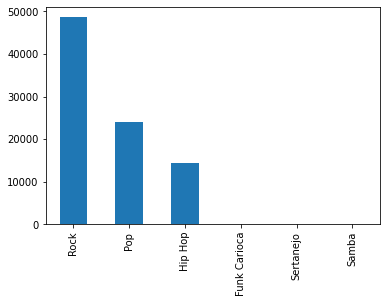

In [16]:
en_lyrics_df['Genre'].value_counts().plot(kind='bar')

##### Separação por gênero (rock)

In [17]:
en_rock_lyrics_df = en_lyrics_df.copy()

en_rock_lyrics_df.drop(
    en_rock_lyrics_df[en_rock_lyrics_df['Genre'] != "Rock"].index, inplace=True)

en_rock_lyrics_df.to_csv(r"./english_rock_lyrics.csv", index=False)

en_rock_lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48617 entries, 133 to 207628
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ALink   48617 non-null  object
 1   SName   48617 non-null  object
 2   SLink   48617 non-null  object
 3   Lyric   48617 non-null  object
 4   Idiom   48617 non-null  object
 5   Genre   48617 non-null  object
dtypes: object(6)
memory usage: 2.6+ MB


#### Portugues

In [18]:
pt_lyrics_df = lyrics_df.copy()

pt_lyrics_df.drop(pt_lyrics_df[pt_lyrics_df['Idiom'] != "PORTUGUESE"].index,
                  inplace=True)

# pt_lyrics_df.to_csv(r"./portuguese_lyrics.csv")

pt_lyrics_df

,ALink,SName,SLink,Lyric,Idiom,Genre
370,/311/,Summer Of Love - Traducao,/311/summer-of-love-traducao.html,Eu pensei na minha cena hoje. E eu finalmente ...,PORTUGUESE,Rock
594,/4seres/,Morada,/4seres/morada.html,Tuas palavras que me fazem caminhar. No caminh...,PORTUGUESE,Rock
595,/a-corte-animal/,À Deriva,/a-corte-animal/a-deriva.html,Quando jovens por assim dizer. Não se é nada. ...,PORTUGUESE,Rock
596,/a-corte-animal/,À Flor da Pele Moderna,/a-corte-animal/a-flor-da-pele-moderna.html,Ó pequena minha pequena cidade grande. Se apro...,PORTUGUESE,Rock
597,/a-corte-animal/,"De Brasília, Com Amor",/a-corte-animal/de-brasilia-com-amor.html,Todo mês eu recebo. Cartas de um estranho. Mar...,PORTUGUESE,Rock
...,...,...,...,...,...,...
209516,/zeca-pagodinho/,Vôo de Paz,/zeca-pagodinho/voo-de-paz.html,Há qualquer coisa entre nós. Que nos priva de ...,PORTUGUESE,Samba
209518,/zeca-pagodinho/,Vou Procurar Esquecer,/zeca-pagodinho/vou-procurar-esquecer.html,Vou procurar um novo amor na minha vida. Porqu...,PORTUGUESE,Samba
209519,/zeca-pagodinho/,Vou Ver Juliana,/zeca-pagodinho/vou-ver-juliana.html,Quando a mare vazá. Vou vê juliana. Vou vê jul...,PORTUGUESE,Samba
209520,/zeca-pagodinho/,Yaô Cadê A Samba / Outro Recado / Hino,/zeca-pagodinho/yao-cade-a-samba-outro-recado-...,"Ô Yaô. Yaô, cadê a samba?. Está mangando na cu...",PORTUGUESE,Samba


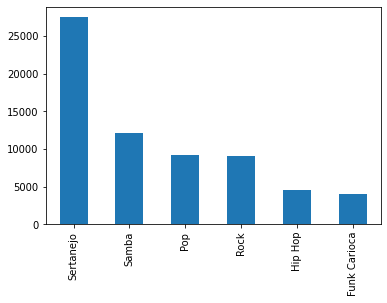

In [19]:
pt_lyrics_df['Genre'].value_counts().plot(kind='bar')

##### Separação por gênero (sertanejo)

In [20]:
pt_sert_lyrics_df = pt_lyrics_df.copy()

pt_sert_lyrics_df.drop(
    pt_sert_lyrics_df[pt_sert_lyrics_df['Genre'] != "Sertanejo"].index,
    inplace=True)

pt_sert_lyrics_df.to_csv(r"./portuguese_sertanejo_lyrics.csv")

pt_sert_lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27509 entries, 12775 to 201783
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ALink   27509 non-null  object
 1   SName   27509 non-null  object
 2   SLink   27509 non-null  object
 3   Lyric   27509 non-null  object
 4   Idiom   27509 non-null  object
 5   Genre   27509 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB


## Tarefas de treinamento e geração de letras

### Filtro músicas Elvis Presley

In [21]:
import pandas as pd

df = pd.read_csv(r"./english_rock_lyrics.csv")

df.head()

,ALink,SName,SLink,Lyric,Idiom,Genre
0,/12-stones/,World So Cold,/12-stones/world-so-cold.html,"It starts with pain, followed by hate. Fueled ...",ENGLISH,Rock
1,/12-stones/,Broken,/12-stones/broken.html,Freedom!. Alone again again alone. Patiently w...,ENGLISH,Rock
2,/12-stones/,3 Leaf Loser,/12-stones/3-leaf-loser.html,"Biting the hand that feeds you, lying to the v...",ENGLISH,Rock
3,/12-stones/,Anthem For The Underdog,/12-stones/anthem-for-the-underdog.html,You say you know just who I am. But you can't ...,ENGLISH,Rock
4,/12-stones/,Adrenaline,/12-stones/adrenaline.html,My heart is beating faster can't control these...,ENGLISH,Rock


In [22]:
df.ALink.value_counts()

/elvis-presley/        747
/bob-dylan/            534
/neil-young/           488
/van-morrison/         485
/bruce-springsteen/    477
                      ... 
/dr-cascadura/           1
/camisa-de-venus/        1
/eternal-alliance/       1
/saint-pradier/          1
/los-hermanos/           1
Name: ALink, Length: 529, dtype: int64

In [23]:
df_elvis = df.copy()
df_elvis = df_elvis.loc[df['ALink'] == '/elvis-presley/']
df_elvis

,ALink,SName,SLink,Lyric,Idiom,Genre
11888,/elvis-presley/,My Way,/elvis-presley/my-way.html,And now the end is near. And so I face the fin...,ENGLISH,Rock
11889,/elvis-presley/,Can't Help Falling In Love,/elvis-presley/cant-help-falling-in-love.html,"Wise men say, only fools rush in. But I can't ...",ENGLISH,Rock
11890,/elvis-presley/,Suspicious Minds,/elvis-presley/suspicious-minds.html,We're caught in a trap. I can't walk out. Beca...,ENGLISH,Rock
11891,/elvis-presley/,Always On My Mind,/elvis-presley/always-on-my-mind.html,"Maybe I didn't treat you,. Quite as good as I ...",ENGLISH,Rock
11892,/elvis-presley/,Love Me Tender,/elvis-presley/love-me-tender.html,"Love me tender, love me sweet,. Never let me g...",ENGLISH,Rock
...,...,...,...,...,...,...
12630,/elvis-presley/,Young and Beautiful,/elvis-presley/young-and-beautiful.html,You're so young and beautiful and I love you s...,ENGLISH,Rock
12631,/elvis-presley/,Young Dreams,/elvis-presley/young-dreams.html,"(Young dreams of love, young dreams of love). ...",ENGLISH,Rock
12632,/elvis-presley/,Your Cheatin' Heart,/elvis-presley/your-cheatin-heart.html,Your cheatin' heart will make you weep. You'll...,ENGLISH,Rock
12633,/elvis-presley/,Your Love's Been A Long Time Coming,/elvis-presley/your-loves-been-a-long-time-com...,The first time I saw you I knew I was hooked o...,ENGLISH,Rock


In [24]:
df_elvis.drop(columns=['ALink', 'SLink', 'Idiom', 'Genre'], inplace=True)

df_elvis.head()

,SName,Lyric
11888,My Way,And now the end is near. And so I face the fin...
11889,Can't Help Falling In Love,"Wise men say, only fools rush in. But I can't ..."
11890,Suspicious Minds,We're caught in a trap. I can't walk out. Beca...
11891,Always On My Mind,"Maybe I didn't treat you,. Quite as good as I ..."
11892,Love Me Tender,"Love me tender, love me sweet,. Never let me g..."


In [50]:
musicas = df_elvis.Lyric.values
vocab_elvis = ''
for song in musicas:
  if '(' in song[0:10]:
    idx_parentese_d = song.find(')')
    song = song[idx_parentese_d+3:]
  vocab_elvis = ''.join(song)
  #print(vocab_elvis)
#vocab_elvis

In [51]:
print(vocab_elvis[:250])

Your time hasn't come yet baby. You got a lot of dreams to go. Your time hasn't come yet baby. But when it does your heart will know. You're gonna be a beautiful woman. Because you're such a beautiful child. And when you start to bloom. Just like a r


In [27]:
vocab = sorted(set(vocab_elvis))
print(f'{len(vocab)} unique characters')

35 unique characters


#### Ref Tensorflow
https://www.tensorflow.org/text/tutorials/text_generation

In [28]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

import numpy as np
import os
import time

In [32]:
chars_from_ids = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

In [35]:
all_ids = ids_from_chars(tf.strings.unicode_split(vocab_elvis, 'UTF-8'))
all_ids

<tf.Tensor: shape=(1064,), dtype=int64, numpy=array([12, 26, 31, ..., 26, 33,  4])>

In [36]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

In [37]:
for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

Y
o
u
r
 
t
i
m
e
 


In [38]:
seq_length = 100
examples_per_epoch = len(vocab_elvis)//(seq_length+1)

In [39]:
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b'Y' b'o' b'u' b'r' b' ' b't' b'i' b'm' b'e' b' ' b'h' b'a' b's' b'n'
 b"'" b't' b' ' b'c' b'o' b'm' b'e' b' ' b'y' b'e' b't' b' ' b'b' b'a'
 b'b' b'y' b'.' b' ' b'Y' b'o' b'u' b' ' b'g' b'o' b't' b' ' b'a' b' '
 b'l' b'o' b't' b' ' b'o' b'f' b' ' b'd' b'r' b'e' b'a' b'm' b's' b' '
 b't' b'o' b' ' b'g' b'o' b'.' b' ' b'Y' b'o' b'u' b'r' b' ' b't' b'i'
 b'm' b'e' b' ' b'h' b'a' b's' b'n' b"'" b't' b' ' b'c' b'o' b'm' b'e'
 b' ' b'y' b'e' b't' b' ' b'b' b'a' b'b' b'y' b'.' b' ' b'B' b'u' b't'
 b' ' b'w' b'h'], shape=(101,), dtype=string)


In [40]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

In [41]:
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

b"Your time hasn't come yet baby. You got a lot of dreams to go. Your time hasn't come yet baby. But wh"
b"en it does your heart will know. You're gonna be a beautiful woman. Because you're such a beautiful c"
b'hild. And when you start to bloom. Just like a rose in June. I bet the schoolboys all go wild, but ri'
b"ght now. Your time hasn't come yet baby. You got a few dreams to go. Your time hasn't come yet baby. "
b"When it does your heart will know. Your life's still a lollipop heaven. Your teddy bear's at the foot"


A cada iteração, o input e label serão representados pelo caractere atual e o próximo caractere.

In [42]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [43]:
split_input_target(list("Tensorflow"))

(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

In [44]:
dataset = sequences.map(split_input_target)

In [45]:
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : b"Your time hasn't come yet baby. You got a lot of dreams to go. Your time hasn't come yet baby. But w"
Target: b"our time hasn't come yet baby. You got a lot of dreams to go. Your time hasn't come yet baby. But wh"


In [ ]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

In [ ]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

In [ ]:
model = MyModel(
    # Be sure the vocabulary size matches the `StringLookup` layers.
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

Modelo setado! Agora vamos testar:

In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, (batch_size, sequence_length, vocab_size))

In [ ]:
model.summary()

In [ ]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer='adam', loss=loss)

In [ ]:
type(dataset)

In [ ]:
EPOCHS = 20
history = model.fit(dataset, epochs=EPOCHS)#, callbacks=[checkpoint_callback])

In [ ]:
example_batch_loss = loss(target_example_batch, example_batch_predictions)
mean_loss = example_batch_loss.numpy().mean()
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", mean_loss)

#### Ref TowardAI
https://towardsai.net/p/deep-learning/create-your-first-text-generator-with-lstm-in-few-minutes

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Embedding
from tensorflow.keras.losses import sparse_categorical_crossentropy

def sparse_cat_loss(y_true,y_pred):
  return sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)

def create_model(vocab_size, embed_dim, rnn_neurons, batch_size):
    model = Sequential()
    model.add(Embedding(vocab_size, embed_dim,batch_input_shape=[batch_size, None]))
    model.add(LSTM(rnn_neurons,return_sequences=True,stateful=True,recurrent_initializer='glorot_uniform'))
    # Final Dense Layer to Predict
    model.add(Dense(vocab_size))
    model.compile(optimizer='adam', loss=sparse_cat_loss) 
    return model

In [46]:
# Batch size
batch_size = 32

# Buffer size to shuffle the dataset so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in which it shuffles elements
buffer_size = 10000

dataset = dataset.shuffle(buffer_size).batch(batch_size, drop_remainder=True)

In [48]:
dataset

<BatchDataset shapes: ((32, 100), (32, 100)), types: (tf.int64, tf.int64)>

In [49]:
# Length of the vocabulary in chars
vocab_size = len(vocab)
# The embedding dimension
embed_dim = 64
# Number of RNN units
rnn_neurons = 1024

#Create the model
model = create_model(
  vocab_size = vocab_size,
  embed_dim=embed_dim,
  rnn_neurons=rnn_neurons,
  batch_size=batch_size)

#Train the model
epochs = 30
model.fit(dataset,epochs=epochs)

Epoch 1/30


ValueError: ignored